# Demo of PTAStateSpaceAnalysis

This notebook demonstrates how to use the methods in this repository.


The notebook is organised as follows:




## 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src") 


In [2]:
#some useful quantities
year = 3.154e7 # in seconds
week = 604800  # in seconds

## 1. Making fake data 



### 1.1 Creating a GW signal
To start, lets generate a stochastic GW background by sampling $M$ BHs, each with 7 parameters.

In [3]:
from make_synthetic_data import BH_population 


#Define the parameters for the power law over Ω
α = -3.0 #Exponent of the power law for the PDF of Ω
Ω_min = 1/(10*year) #lower bound on the Ω power law distribution. Set by Tobs
Ω_max = 1/(week)  #upper bound on the Ω power law distribution. Set by dt
M = int(1e4)

universe_i_sgwb = BH_population(α,Ω_min,Ω_max,M) #this is a random realisation of the universe


INFO:root:Generating a GW signal with M = 10000


For $M=1$, you can also specify the 7 parameters explicitly. In this case $\alpha$, $\Omega_{\rm min}$, $\Omega_{\rm max}$ are ignored. 

In [4]:
parameters_dictionary = {
  "Ω": 5e-7,
  "h": 1e-12,
  "φ0": 0.20,
  "ψ": 2.50,
  "ι": 1.0,
  "δ": 1.0,
  "α": 1.0
}

universe_single_source = BH_population(M=1,parameters_dictionary=parameters_dictionary) #this is a random realisation of the universe


INFO:root:Generating a GW signal with M = 1


### 1.2 Creating a PTA

Now we specify the pulsars that constitute our PTA. For this demo we use the pulsars specified in `data/NANOGrav_pulsars.csv`

In [ ]:
from make_synthetic_data import Pulsars
PTA = Pulsars(pulsar_file='../data/NANOGrav_pulsars.csv',
              γp=1e-13,
              dt_weeks=1,
              Tobs_years=10)

### 1.3 $a(t)$ signal 

Given our GW signal and our PTA, we can calculate the $a^{(n)}(t)$ redshift. 


In [ ]:
from gravitational_waves import GW

SGWB = GW(universe_i_sgwb,PTA)
a = SGWB.compute_a()

INFO:root:Generating a GW signal with M = 10000


(3, 10000) (3, 10000)
eplus shape is (3, 3, 10000)
ecross shape is (3, 3, 10000)
(47, 3)


Text(0.5, 0, '$t$ [years]')

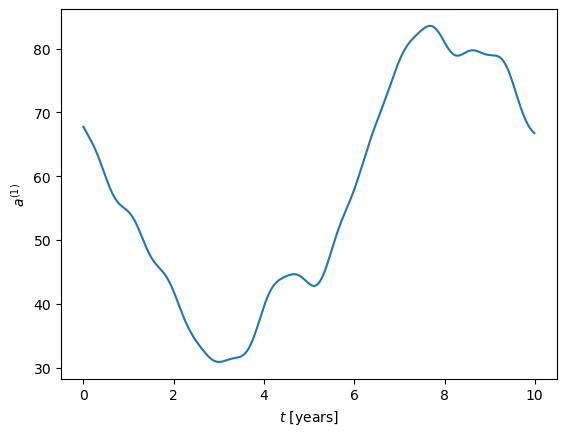

In [8]:
import matplotlib.pyplot as plt 
t = PTA.t / year 

psr_index = 1
plt.plot(t,a[:,0]) 
plt.ylabel(rf'$a^{{({psr_index})}}$')
plt.xlabel(r'$t$ [years]')

We can do the same thing for a single source:

In [9]:
GW_single_source= GW(universe_single_source,PTA)
a = GW_single_source.compute_a()

psr_index = 1
plt.plot(t,a[:,0]) 
plt.ylabel(rf'$a^{{({psr_index})}}$')
plt.xlabel(r'$t$ [years]')

TypeError: object of type 'float' has no len()